1. 모듈 및 함수

In [61]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams["axes.unicode_minus"] = False
mpl.rc("font", family = "Gulim")

In [2]:
def bar_graph(x, y, z):
    temp_20["INVC_CONT"].reset_index(drop=True)[y:z].plot(kind="bar")
    plt.title(day_sum(x, y, z))
    plt.xlabel("일")
    plt.ylabel("건수")
    plt.show()

In [3]:
def month_graph(x):
    plt.plot(range(2, 6), temp_20["INVC_CONT"],label="2020")
    plt.plot(range(2, 6), temp_19["INVC_CONT"],label="2019")
    plt.grid(b=None, which='major', axis="both")
    plt.xticks([2, 3, 4, 5])
    plt.title(x+" 월 단위 물류 건수 그래프")
    plt.xlabel("월")
    plt.ylabel("건수")
    plt.legend()
    plt.show()

In [4]:
def day_graph(x,y,z):
    plt.figure(figsize=(20, 10))
    plt.plot(range(y), temp_20["INVC_CONT"],label="2020")
    plt.plot(range(z), temp_19["INVC_CONT"],label="2019")
    plt.grid(b=None, which='major', axis="both")
    plt.title(x+" 일 단위 그래프")
    plt.xlabel("일")
    plt.ylabel("건수")
    plt.legend()
    plt.show()

In [5]:
def day_sum(x, y, z):
    if x == 19:
        if y <= 27:
            a = "2월"+str(1+y)+"일~" 
        elif y <= 58:
            a = "3월"+str(y-27)+"일~"
        elif y <= 88:
            a = "4월"+str(y-58)+"일~"
        else:
            a = "5월"+str(y-88)+"일~"
        if z <= 27:
            b = "2월"+str(1+y)+"일 그래프" 
        elif z <= 58:
            b = "3월"+str(y-27)+"일 그래프"
        elif z <= 88:
            b = "4월"+str(y-58)+"일 그래프"
        else:
            b = "5월"+str(y-88)+"일 그래프"
    elif x == 20:
        if y <= 28:
            a = "2월"+str(1+y)+"일~" 
        elif y <= 59:
            a = "3월"+str(y-28)+"일~"
        elif y <= 89:
            a = "4월"+str(y-59)+"일~"
        else:
            a = "5월"+str(y-89)+"일~"
        if z <= 28:
            b = "2월"+str(z)+"일 그래프" 
        elif z <= 59:
            b = "3월"+str(z-29)+"일 그래프"
        elif z <= 89:
            b = "4월"+str(z-60)+"일 그래프"
        else:
            b = "5월"+str(z-90)+"일 그래프"
    return a + b

In [6]:
def plot_line_graph(x, y):    
    stack_num_list = list(stack_info_2["상품대분류코드"].values)
    stack_name_list = list(stack_info_2["상품대분류명"].values)
    cnt = 0
    fig = plt.figure(figsize=(13, 25))
    
    if ((x == None) & (y == None)):
        temp = stack
        fig.suptitle("전체 월 별 물류 건수 그래프", fontsize = 24)
        
    else:
        temp = stack.loc[(stack["CTPV_NM"] == x) & (stack["CTGG_NM"] == y)]
        fig.suptitle(x+" "+y+" 월 별 물류 건수 그래프", fontsize = 24)
    
    for i in range(12):
        if i == 1:
            continue
        
        else:
            fig.add_subplot(6,2,(i+1))
        
        if i == 0:
            YM_SUM = temp.groupby("DL_YM").sum().reset_index()
            plt.title("전체")
        
        elif i == 1:
            continue
        
        else:
            YM_SUM = temp.loc[stack["DL_GD_LCLS_CD"] == stack_num_list[cnt]].groupby("DL_YM").sum().reset_index()
            plt.title(stack_name_list[cnt])
            cnt += 1
        
        temp_20 = YM_SUM[["DL_YM", "INVC_CONT"]].loc[YM_SUM["DL_YM"]>2000]
        temp_19 = YM_SUM[["DL_YM", "INVC_CONT"]].loc[YM_SUM["DL_YM"]<2000]    
        plt.plot(range(2, 6), temp_20["INVC_CONT"],label="2020")
        plt.plot(range(2, 6), temp_19["INVC_CONT"],label="2019")
        plt.grid(b=None, which='major', axis="both")
        plt.xticks([2, 3, 4, 5])
        plt.ylabel("건수")
        plt.legend()  
    
    plt.show()

2. 정의서

In [7]:
stack_info_1 = pd.read_excel("../Desktop/새 폴더/2020빅콘테스트 문제데이터(혁신아이디어분야)/05_물류데이터(CJ올리브네트웍스)/05_혁신아이디어분야_물류데이터(CJ올리브네트웍스)_데이터정의서.xlsx",header=5)

In [8]:
stack_info_1

,Unnamed: 0,순서,컬럼ID,Unnamed: 3,컬럼명,물리데이터타입,비고
0,NaN,1,DL_YMD,NaN,배송년월일,VARCHAR(6),NaN
1,NaN,2,DL_GD_LCLS_NM,NaN,배송상품대분류명,VARCHAR(100),NaN
2,NaN,3,DL_GD_LCLS_CD,NaN,배송상품대분류코드,VARCHAR(40),NaN
3,NaN,4,CTPV_NM,NaN,시도명,VARCHAR(50),NaN
4,NaN,5,CTPV_CD,NaN,시도코드,VARCHAR(2),NaN
5,NaN,6,CTGG_NM,NaN,시군구명,VARCHAR(50),NaN
6,NaN,7,CTGG_CD,NaN,시군구코드,VARCHAR(5),NaN
7,NaN,8,HDNG_NM,NaN,행정동명,VARCHAR(50),NaN
8,NaN,9,HDNG_CD,NaN,행정동코드,VARCHAR(10),NaN
9,NaN,10,INVC_CONT,NaN,송장건수,NUMBER(18),NaN


In [9]:
stack_info_1.drop(columns = ["Unnamed: 0", "Unnamed: 3", "비고"], inplace=True)
stack_info_1

,순서,컬럼ID,컬럼명,물리데이터타입
0,1,DL_YMD,배송년월일,VARCHAR(6)
1,2,DL_GD_LCLS_NM,배송상품대분류명,VARCHAR(100)
2,3,DL_GD_LCLS_CD,배송상품대분류코드,VARCHAR(40)
3,4,CTPV_NM,시도명,VARCHAR(50)
4,5,CTPV_CD,시도코드,VARCHAR(2)
5,6,CTGG_NM,시군구명,VARCHAR(50)
6,7,CTGG_CD,시군구코드,VARCHAR(5)
7,8,HDNG_NM,행정동명,VARCHAR(50)
8,9,HDNG_CD,행정동코드,VARCHAR(10)
9,10,INVC_CONT,송장건수,NUMBER(18)


In [10]:
stack_info_2 = pd.read_excel("../Desktop/새 폴더/2020빅콘테스트 문제데이터(혁신아이디어분야)/05_물류데이터(CJ올리브네트웍스)/05_혁신아이디어분야_물류데이터(CJ올리브네트웍스)_데이터정의서.xlsx",sheet_name="참고)상품카테고리(대분류>중분류)코드",header=1)

In [11]:
stack_info_2

,Unnamed: 0,상품대분류코드,상품대분류명,상품 예시
0,NaN,10,가구/인테리어,"거실가구, 아동가구, 주방가구, 침실가구"
1,NaN,12,도서/음반,도서/음반
2,NaN,13,디지털/가전,"계절가전, 광학기기, 생활가전, 이미용가전, 주방가전, 자동차기기"
3,NaN,15,생활건강,"건강관리/건강측정, 문구/사무용품, 생활용품, 욕실용품, 주방용품, 수납정리용품, 애완"
4,NaN,16,스포츠/레져,"검도, 골프, 권투, 낚시, 농구, 등산, 배드민턴, 야구, 축구, 캠핑"
5,NaN,17,식품,"가공식품, 건강식품, 신선식품, 반찬, 과자/간식/음료"
6,NaN,18,출산/육아,"기저귀, 분유/이유식, 수유용품, 유아용품"
7,NaN,19,패션의류,"의류, 언더웨어"
8,NaN,20,패션잡화,"가방/지갑, 신발, 악세서리"
9,NaN,21,화장품/미용,"기초화장품, 색조화장품, 바디용품, 헤어용품, 뷰티소품, 향수"


In [12]:
stack_info_2.drop(columns=["Unnamed: 0"], inplace=True)
stack_info_2

,상품대분류코드,상품대분류명,상품 예시
0,10,가구/인테리어,"거실가구, 아동가구, 주방가구, 침실가구"
1,12,도서/음반,도서/음반
2,13,디지털/가전,"계절가전, 광학기기, 생활가전, 이미용가전, 주방가전, 자동차기기"
3,15,생활건강,"건강관리/건강측정, 문구/사무용품, 생활용품, 욕실용품, 주방용품, 수납정리용품, 애완"
4,16,스포츠/레져,"검도, 골프, 권투, 낚시, 농구, 등산, 배드민턴, 야구, 축구, 캠핑"
5,17,식품,"가공식품, 건강식품, 신선식품, 반찬, 과자/간식/음료"
6,18,출산/육아,"기저귀, 분유/이유식, 수유용품, 유아용품"
7,19,패션의류,"의류, 언더웨어"
8,20,패션잡화,"가방/지갑, 신발, 악세서리"
9,21,화장품/미용,"기초화장품, 색조화장품, 바디용품, 헤어용품, 뷰티소품, 향수"


3. 자료 가져오기 및 이상치 결측치 확인

In [13]:
stack = pd.read_excel("../Desktop/새 폴더/2020빅콘테스트 문제데이터(혁신아이디어분야)/05_물류데이터(CJ올리브네트웍스)/2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx")

In [14]:
stack.head()

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21


In [15]:
stack.shape

(156571, 10)

In [16]:
stack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   DL_YMD         156571 non-null  int64 
 1   DL_GD_LCLS_NM  156571 non-null  object
 2   DL_GD_LCLS_CD  156571 non-null  int64 
 3   CTPV_NM        156571 non-null  object
 4   CTPV_CD        156571 non-null  int64 
 5   CTGG_NM        156571 non-null  object
 6   CTGG_CD        156571 non-null  int64 
 7   HDNG_NM        156571 non-null  object
 8   HDNG_CD        156571 non-null  int64 
 9   INVC_CONT      156571 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 11.9+ MB


In [17]:
stack.isnull().sum() / len(stack)

DL_YMD           0.0
DL_GD_LCLS_NM    0.0
DL_GD_LCLS_CD    0.0
CTPV_NM          0.0
CTPV_CD          0.0
CTGG_NM          0.0
CTGG_CD          0.0
HDNG_NM          0.0
HDNG_CD          0.0
INVC_CONT        0.0
dtype: float64

In [18]:
stack.describe()

,DL_YMD,DL_GD_LCLS_CD,CTPV_CD,CTGG_CD,HDNG_CD,INVC_CONT
count,156571.000000,156571.000000,156571.000000,156571.000000,156571.000000,156571.000000
mean,195459.258394,16.080583,19.060037,23.396127,615.068627,113.849142
std,4997.860918,3.456943,7.999800,9.215065,52.076449,151.743973
min,190201.000000,10.000000,11.000000,11.000000,510.000000,1.000000
25%,190404.000000,13.000000,11.000000,14.000000,575.000000,14.000000
50%,200203.000000,16.000000,27.000000,26.000000,619.000000,55.000000
75%,200402.000000,19.000000,27.000000,35.000000,660.000000,156.000000
max,200531.000000,21.000000,27.000000,35.000000,720.000000,2667.000000


4. 필요한 컬럼 추가

In [28]:
stack["DL_YM"] = stack["DL_YMD"].map(lambda x : x // 100)
stack["DL_Y"] = stack["DL_YMD"].map(lambda x : x // 10000)
stack["CODE"] = pd.Series(map(lambda a,b,c,d,e:int(str(a)+str(b)+str(c)+str(d)+str(e)),stack["DL_YMD"],stack["DL_GD_LCLS_CD"],stack['CTPV_CD'],stack['CTGG_CD'],stack['HDNG_CD']))

In [29]:
stack.head()

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,DL_YM,DL_Y,CODE
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,1902,19,190201121114665
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,1902,19,190201101114615
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,1902,19,190201102711565
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,1902,19,190201122711650
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,1902,19,190201132726690


5. 그래프

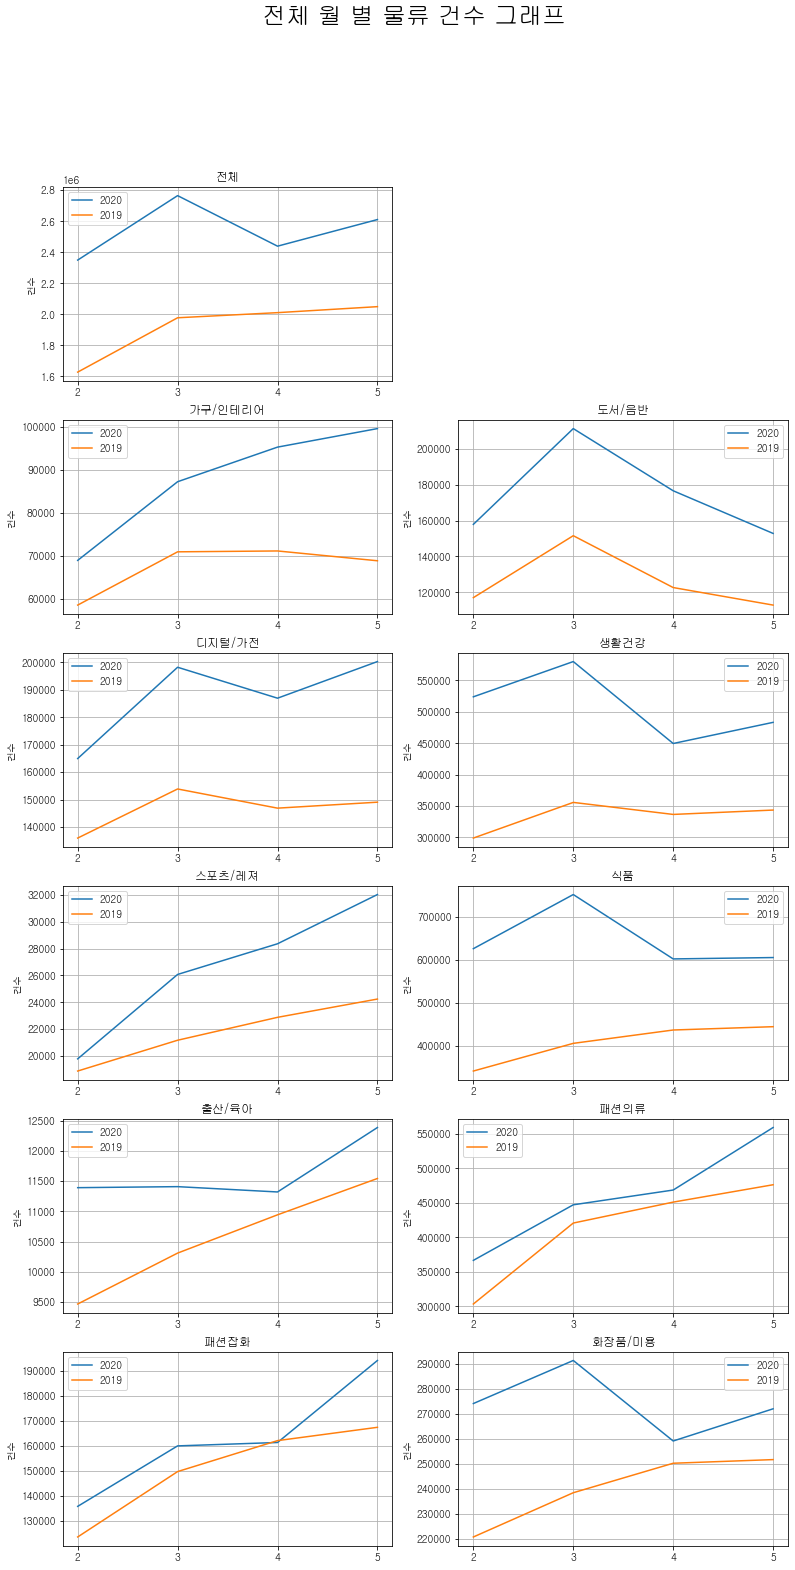

In [23]:
plot_line_graph(None, None)

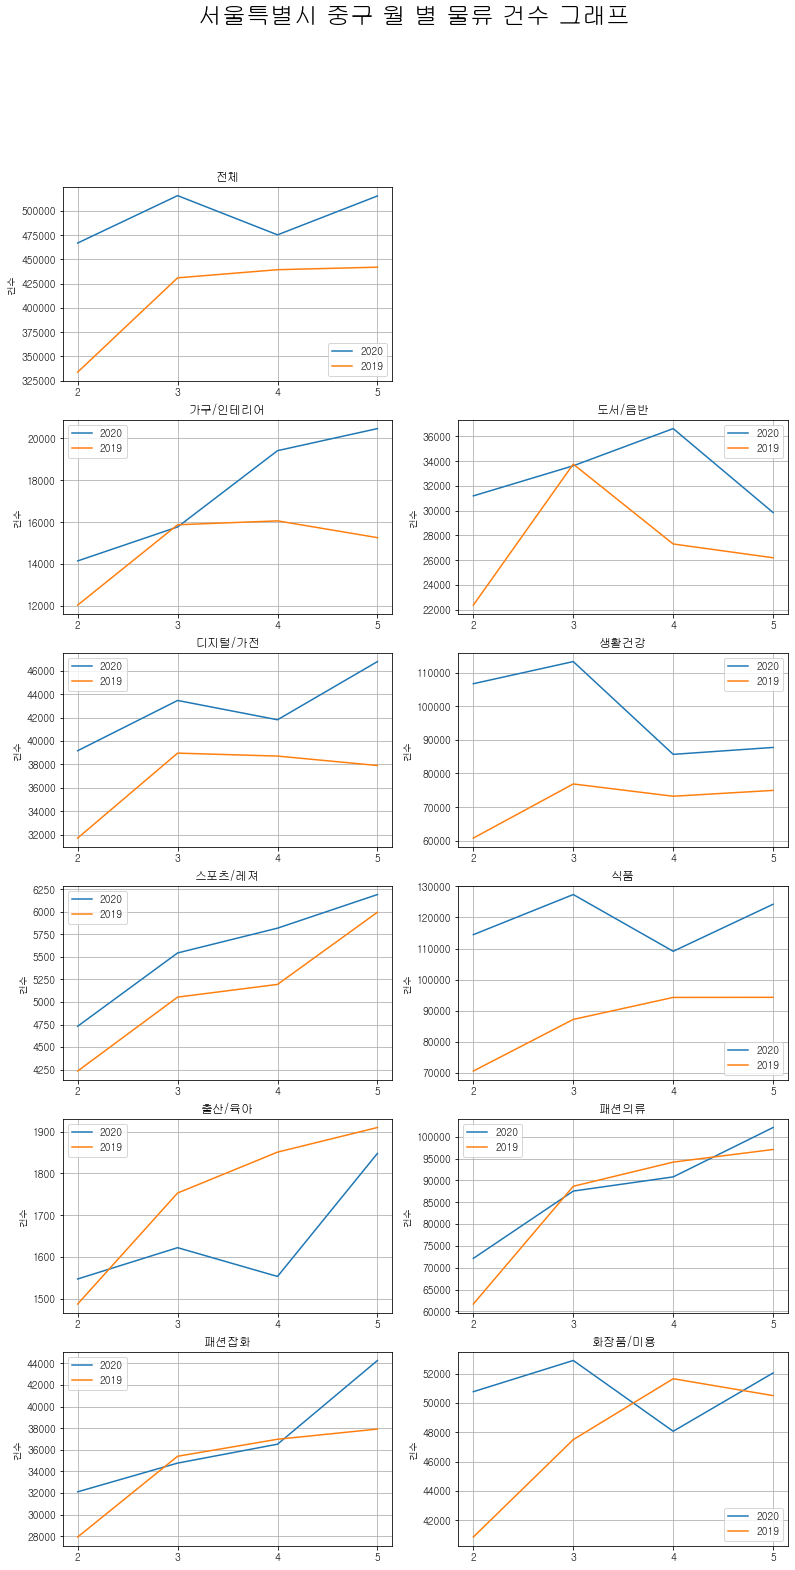

In [24]:
plot_line_graph("서울특별시", "중구")

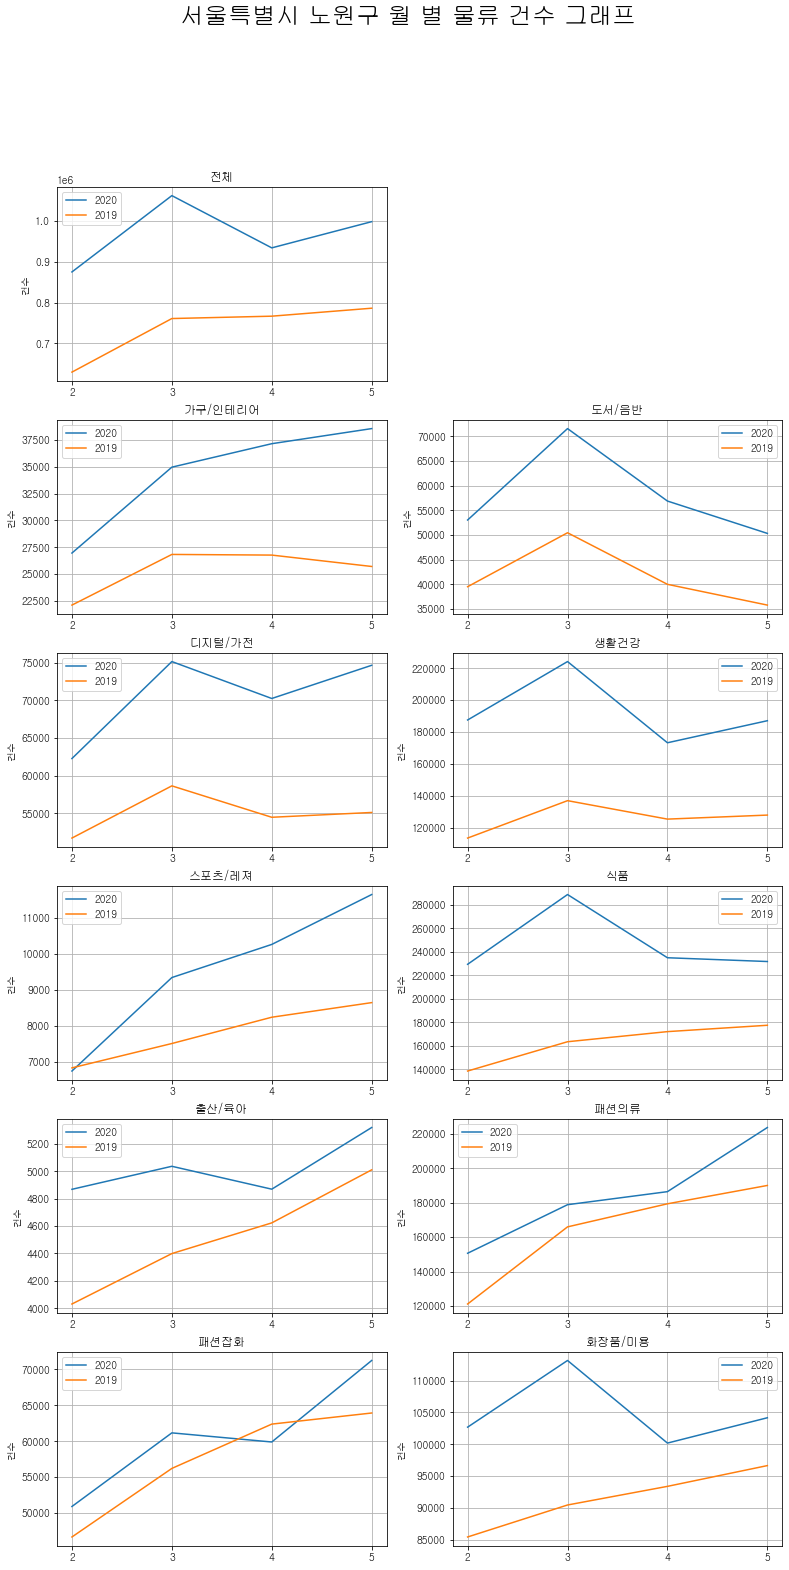

In [25]:
plot_line_graph("서울특별시", "노원구")

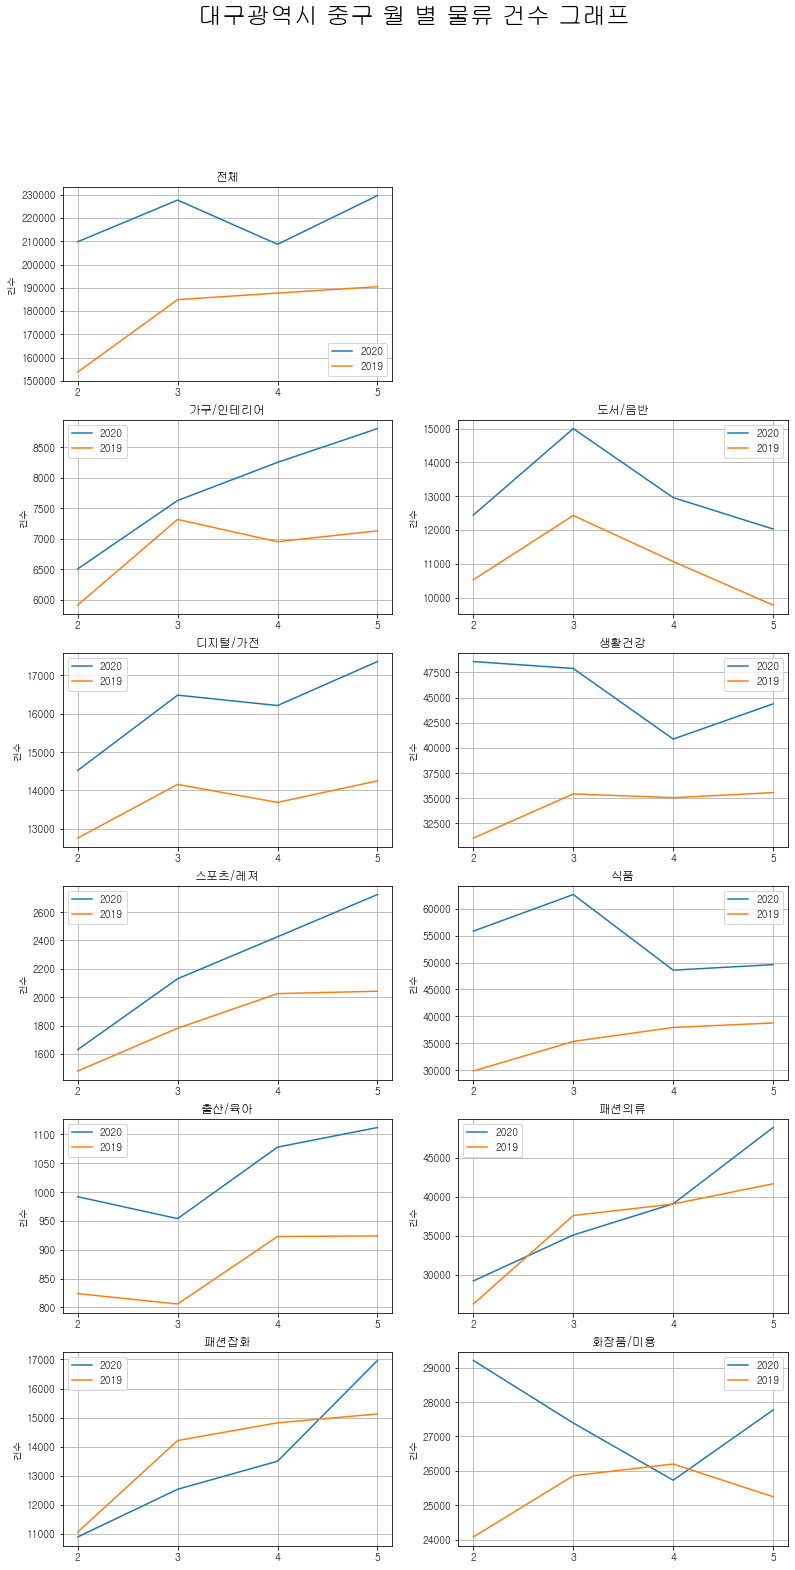

In [26]:
plot_line_graph("대구광역시", "중구")

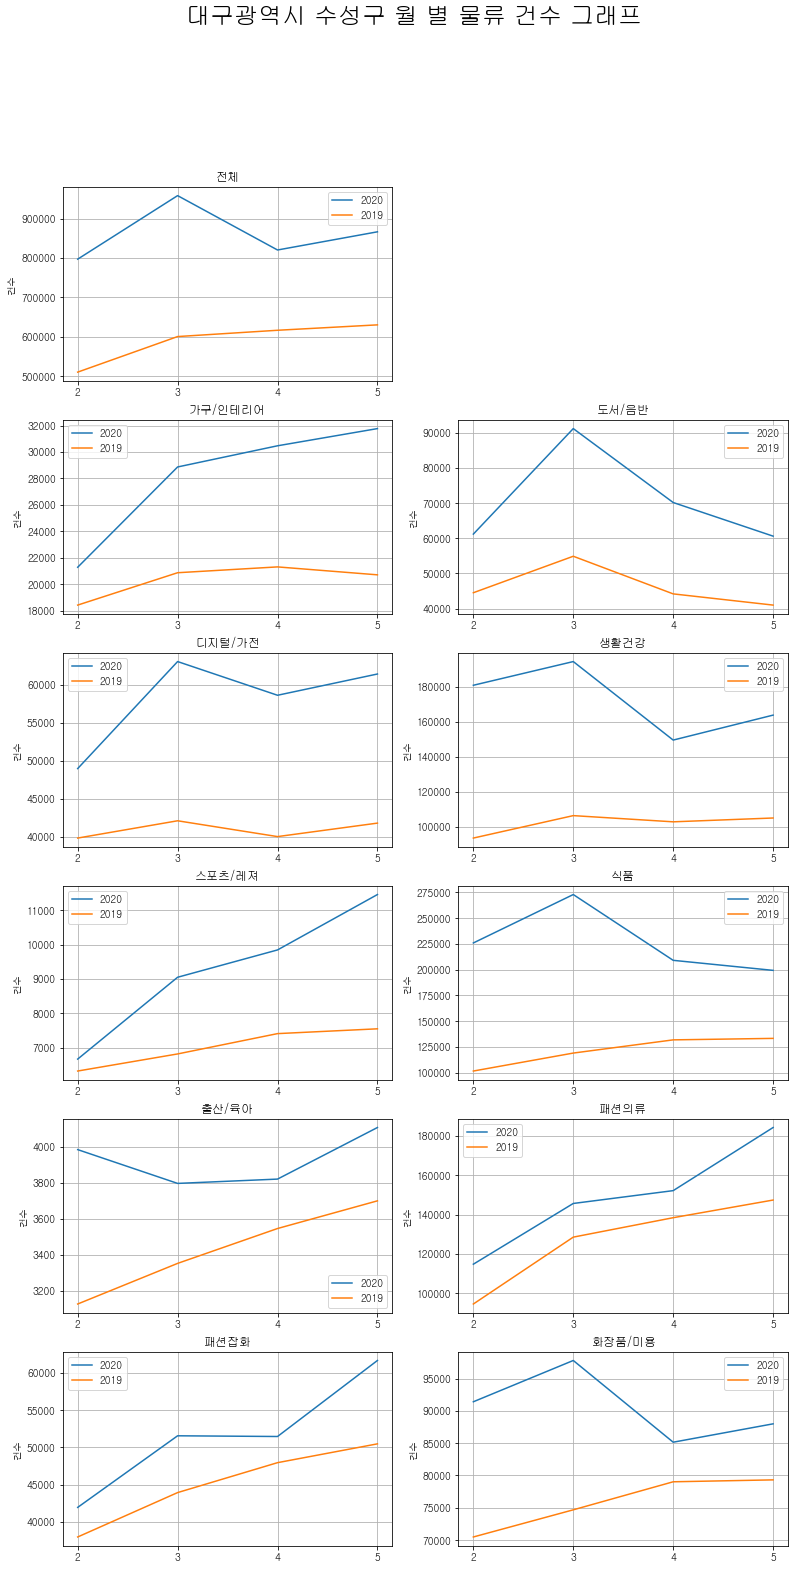

In [27]:
plot_line_graph("대구광역시", "수성구")

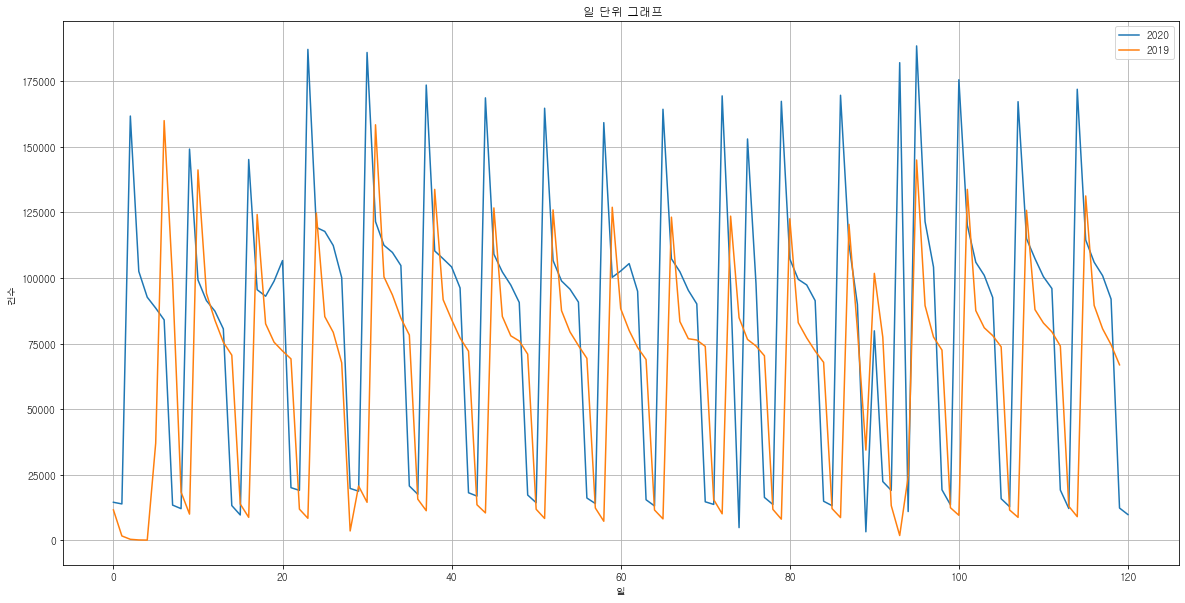

In [25]:
YMD_SUM = stack.groupby("DL_YMD").sum().reset_index()
temp_20 = YMD_SUM[["DL_YMD","INVC_CONT"]].loc[YMD_SUM["DL_YMD"]>200000]
temp_19 = YMD_SUM[["DL_YMD","INVC_CONT"]].loc[YMD_SUM["DL_YMD"]<200000]
day_graph("",121,120)

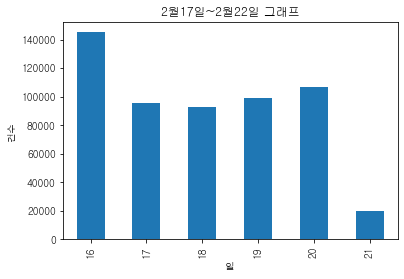

In [26]:
bar_graph(20, 16, 22)

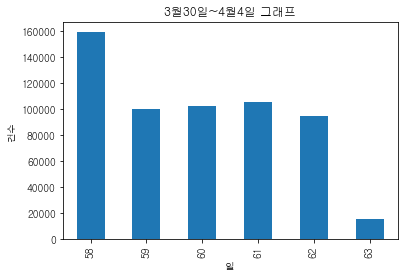

In [27]:
bar_graph(20, 58, 64)

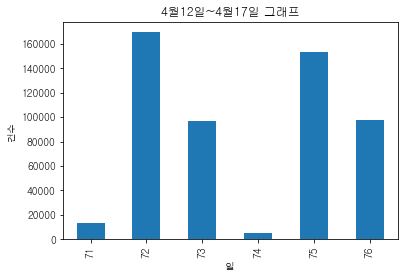

In [28]:
bar_graph(20, 71, 77)

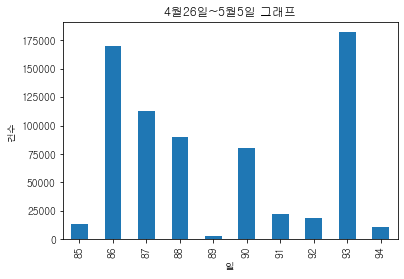

In [29]:
bar_graph(20, 85, 95)

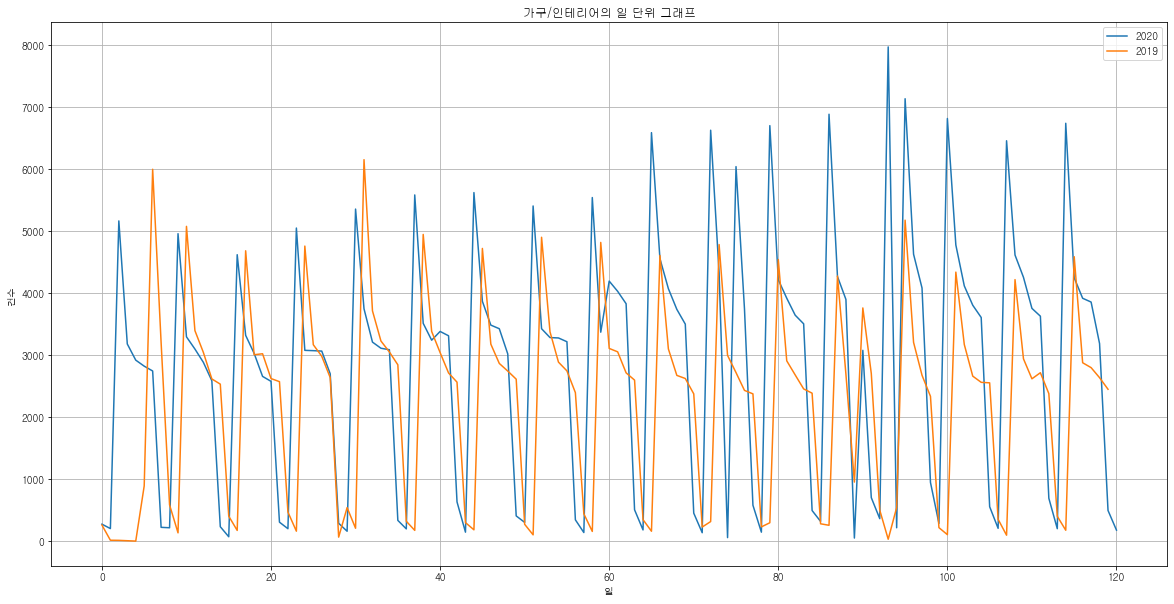

In [33]:
stack_10 = stack.loc[stack["DL_GD_LCLS_CD"] == 10].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_10[["DL_YMD","INVC_CONT"]].loc[stack_10["DL_YMD"]>200000]
temp_19 = stack_10[["DL_YMD","INVC_CONT"]].loc[stack_10["DL_YMD"]<200000]
day_graph("가구/인테리어의",121,120)

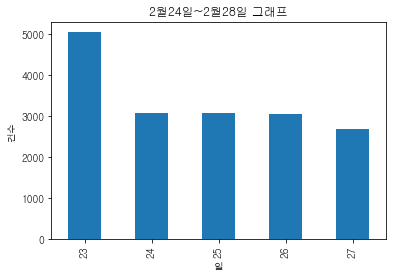

In [163]:
bar_graph(20, 23, 28)

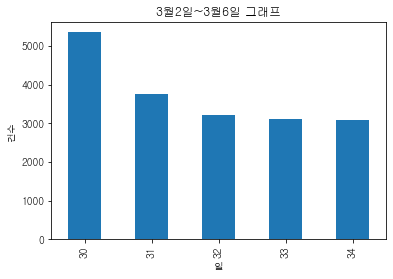

In [164]:
bar_graph(20, 30, 35)

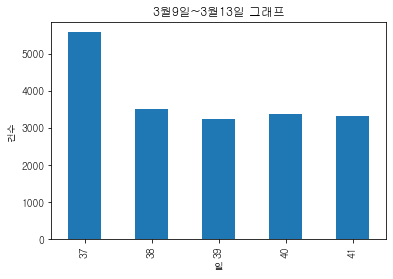

In [165]:
bar_graph(20, 37, 42)

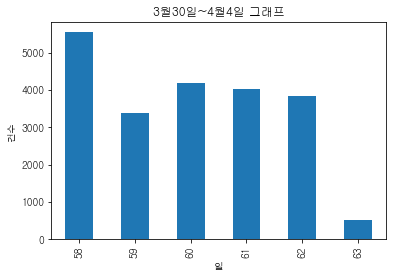

In [166]:
bar_graph(20, 58, 64)

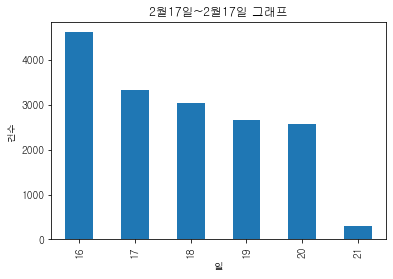

In [167]:
bar_graph(19, 16, 22)

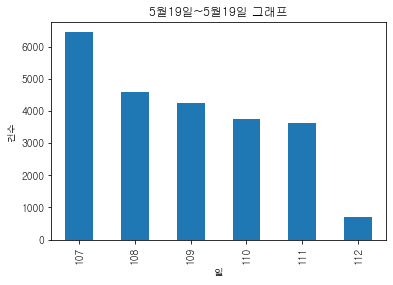

In [168]:
bar_graph(19, 107, 113)

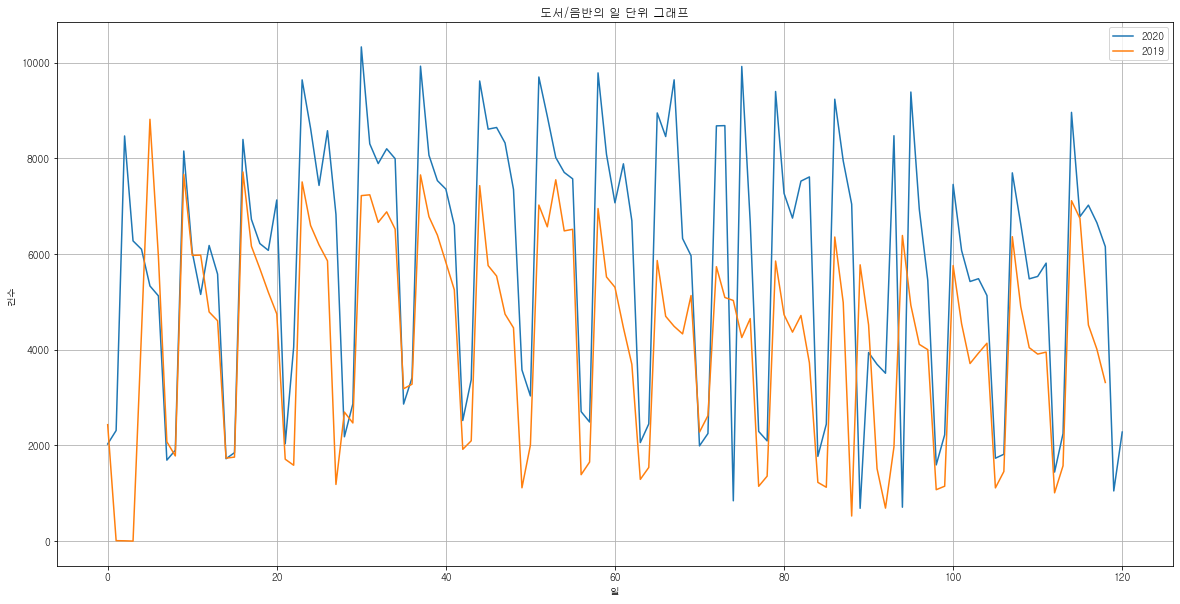

In [42]:
stack_12 = stack.loc[stack["DL_GD_LCLS_CD"] == 12].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_12[["DL_YMD","INVC_CONT"]].loc[stack_12["DL_YMD"]>200000]
temp_19 = stack_12[["DL_YMD","INVC_CONT"]].loc[stack_12["DL_YMD"]<200000]
day_graph("도서/음반의",121,119)

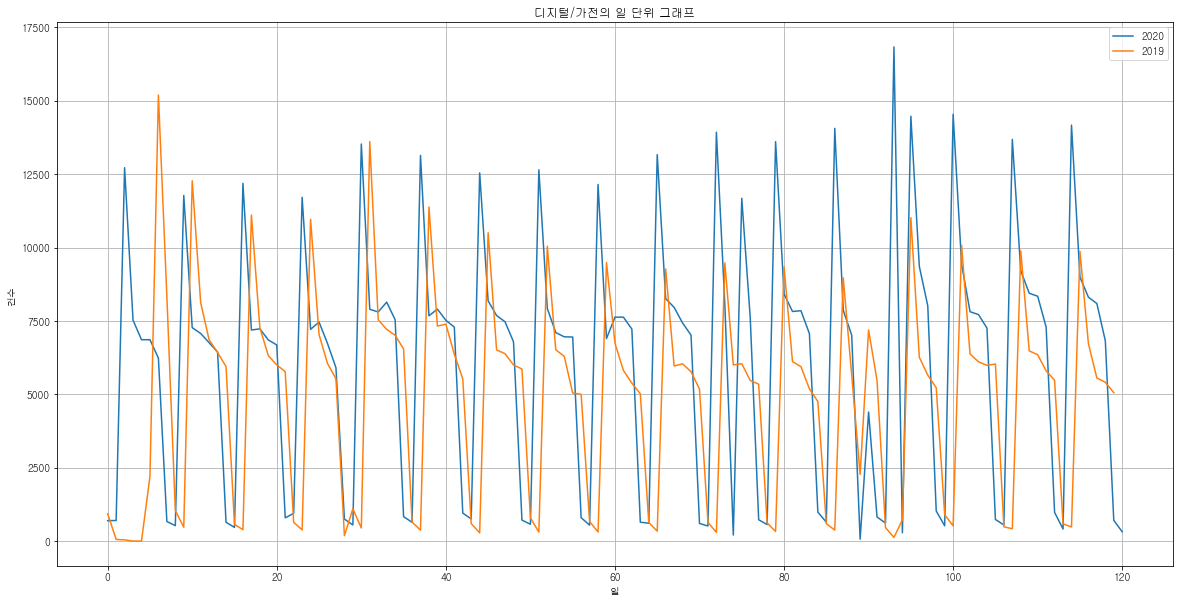

In [44]:
stack_13 = stack.loc[stack["DL_GD_LCLS_CD"] == 13].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_13[["DL_YMD","INVC_CONT"]].loc[stack_13["DL_YMD"]>200000]
temp_19 = stack_13[["DL_YMD","INVC_CONT"]].loc[stack_13["DL_YMD"]<200000]
day_graph("디지털/가전의",121,120)

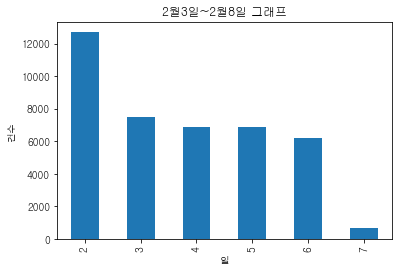

In [180]:
bar_graph(20, 2, 8)

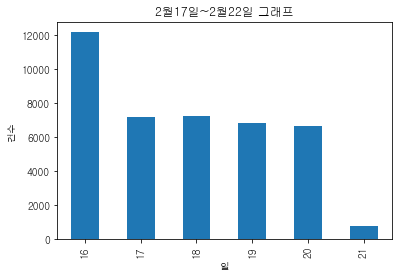

In [183]:
bar_graph(20, 16, 22)

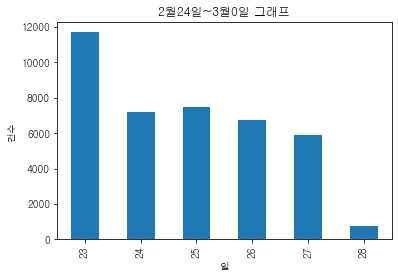

In [189]:
bar_graph(20, 23, 29)

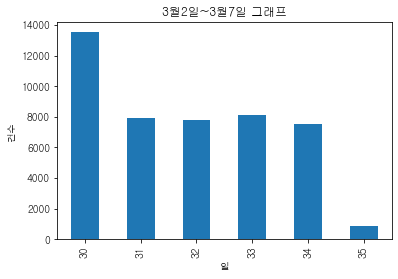

In [191]:
bar_graph(20, 30, 36)

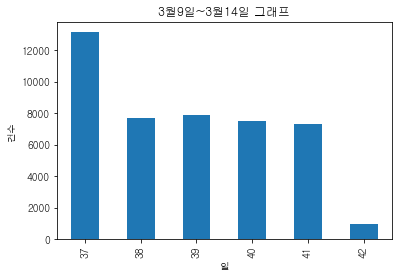

In [195]:
bar_graph(20, 37, 43)

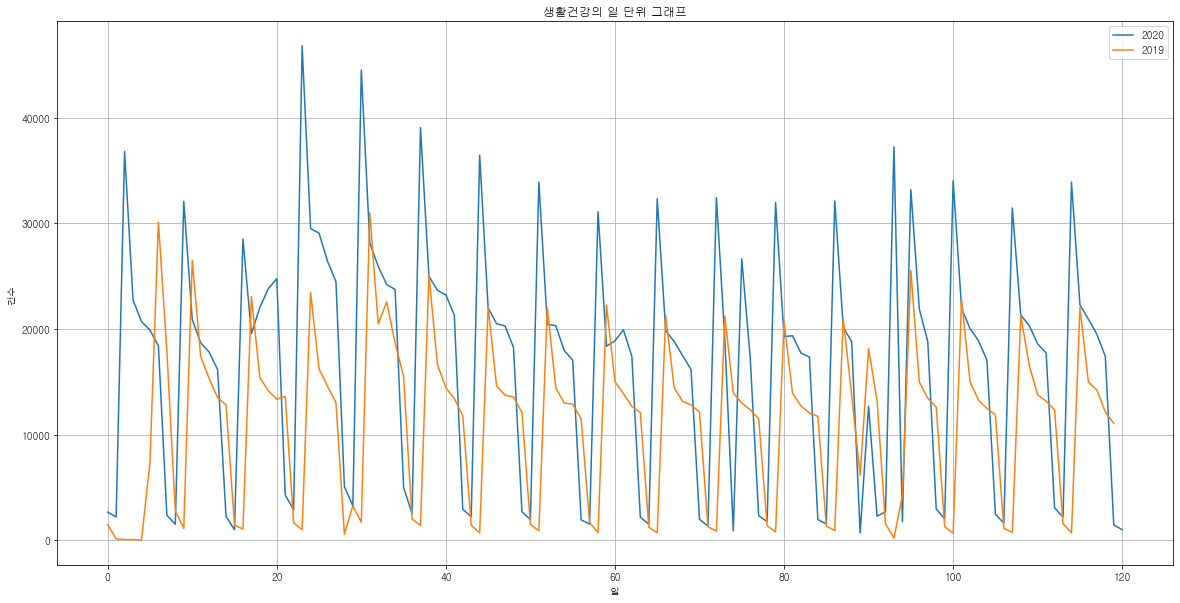

In [45]:
stack_15 = stack.loc[stack["DL_GD_LCLS_CD"] == 15].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_15[["DL_YMD","INVC_CONT"]].loc[stack_15["DL_YMD"]>200000]
temp_19 = stack_15[["DL_YMD","INVC_CONT"]].loc[stack_15["DL_YMD"]<200000]
day_graph("생활건강의",121,120)

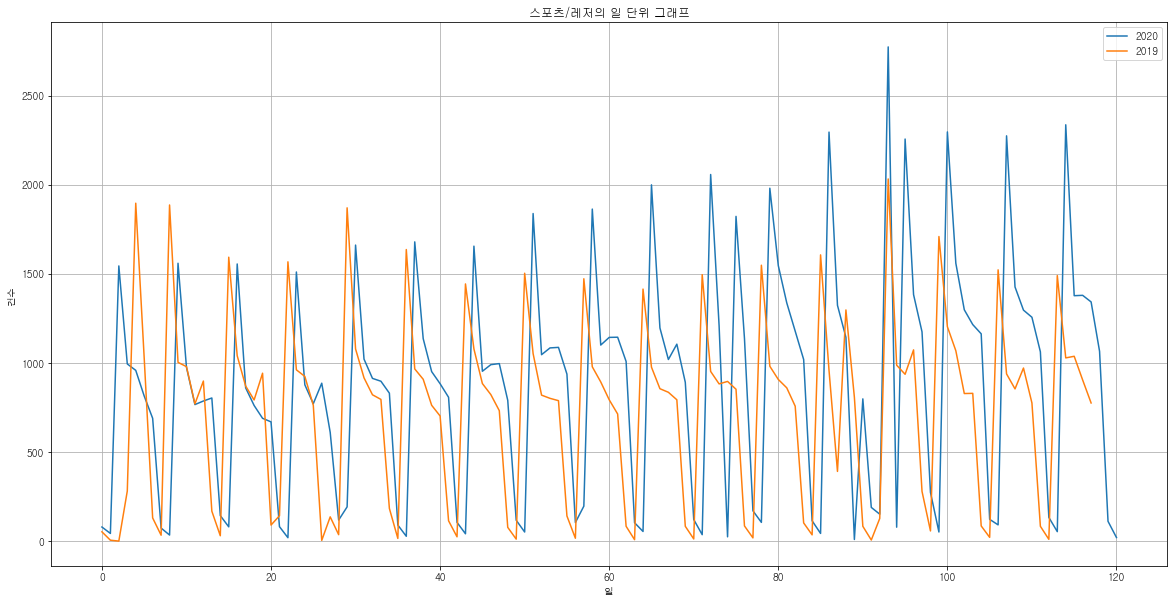

In [51]:
stack_16 = stack.loc[stack["DL_GD_LCLS_CD"] == 16].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_16[["DL_YMD","INVC_CONT"]].loc[stack_16["DL_YMD"]>200000]
temp_19 = stack_16[["DL_YMD","INVC_CONT"]].loc[stack_16["DL_YMD"]<200000]
day_graph("스포츠/레저의",121,118)

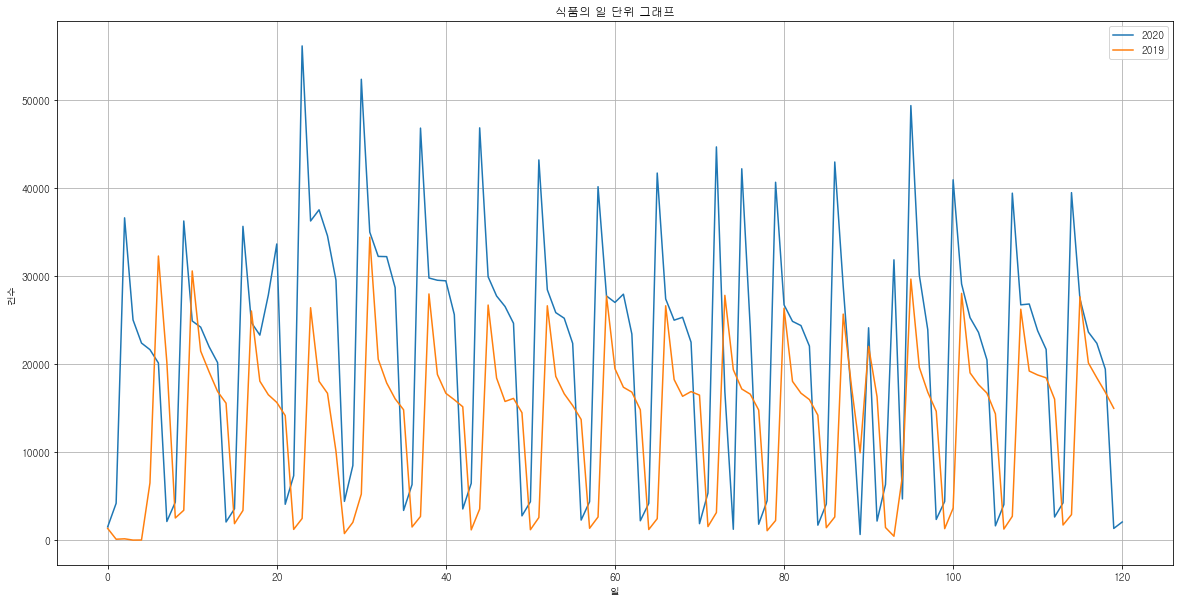

In [52]:
stack_17 = stack.loc[stack["DL_GD_LCLS_CD"] == 17].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_17[["DL_YMD","INVC_CONT"]].loc[stack_17["DL_YMD"]>200000]
temp_19 = stack_17[["DL_YMD","INVC_CONT"]].loc[stack_17["DL_YMD"]<200000]
day_graph("식품의",121,120)

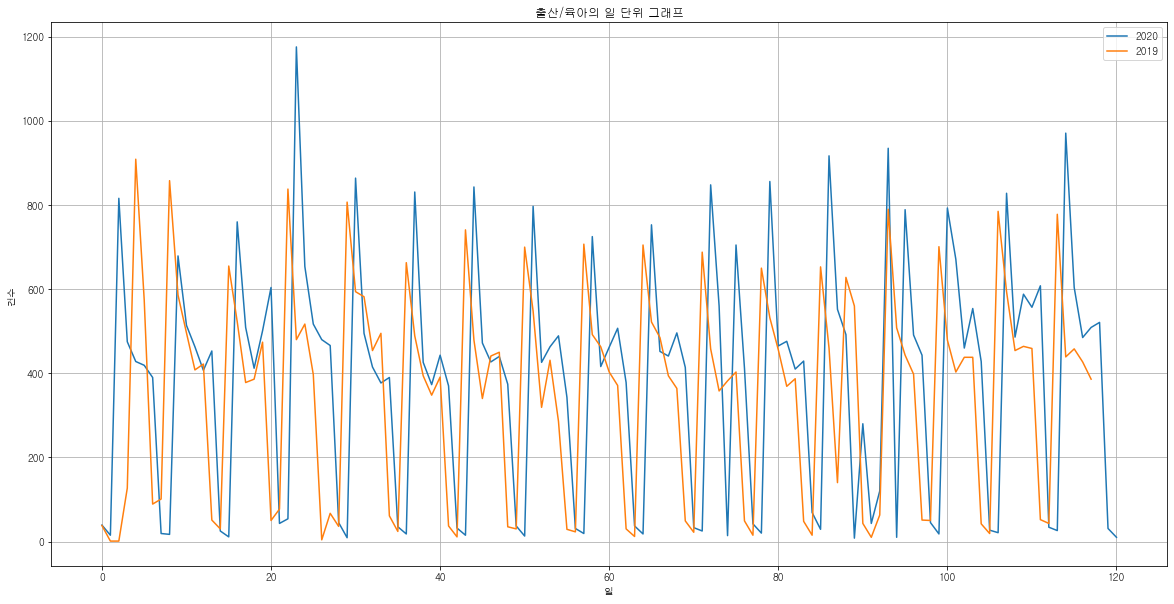

In [56]:
stack_18 = stack.loc[stack["DL_GD_LCLS_CD"] == 18].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_18[["DL_YMD","INVC_CONT"]].loc[stack_18["DL_YMD"]>200000]
temp_19 = stack_18[["DL_YMD","INVC_CONT"]].loc[stack_18["DL_YMD"]<200000]
day_graph("출산/육아의",121,118)

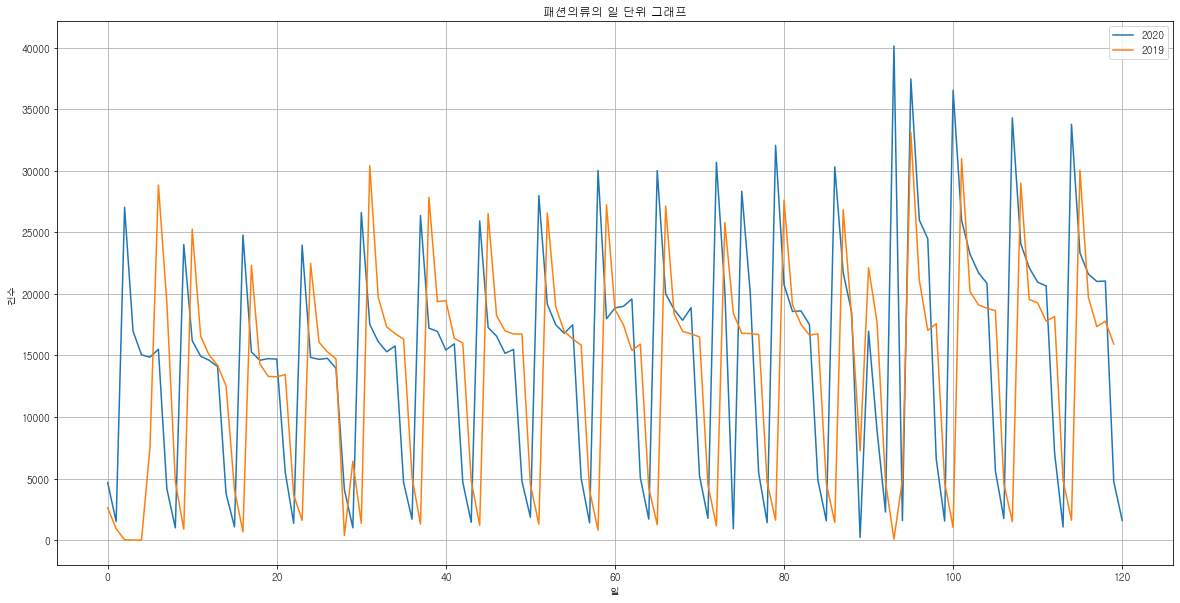

In [57]:
stack_19 = stack.loc[stack["DL_GD_LCLS_CD"] == 19].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_19[["DL_YMD","INVC_CONT"]].loc[stack_19["DL_YMD"]>200000]
temp_19 = stack_19[["DL_YMD","INVC_CONT"]].loc[stack_19["DL_YMD"]<200000]
day_graph("패션의류의",121,120)

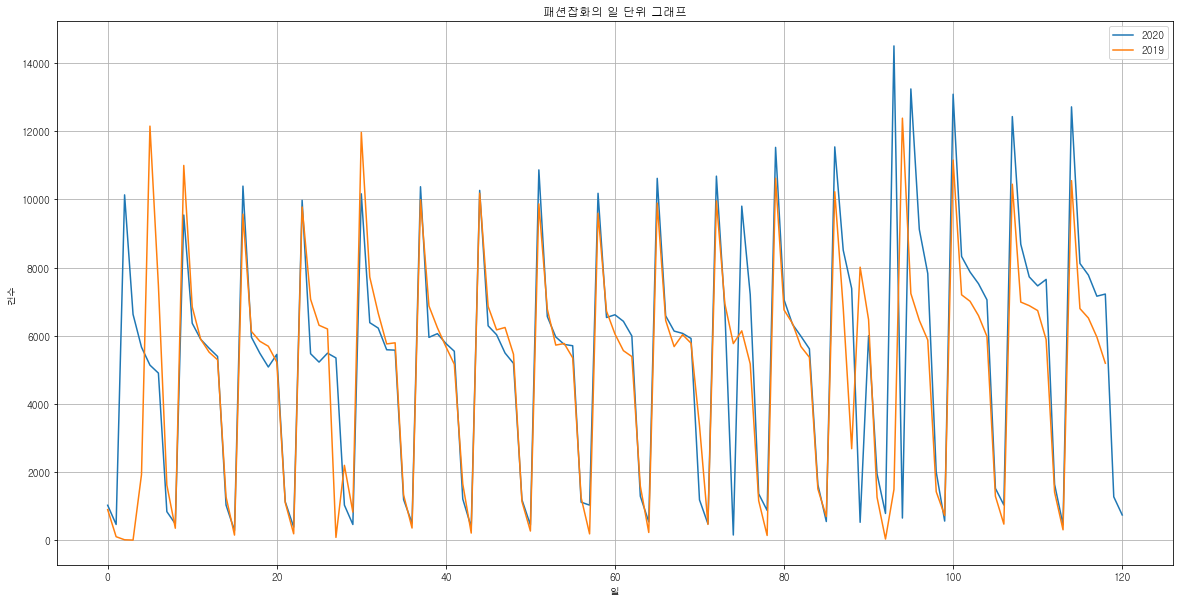

In [60]:
stack_20 = stack.loc[stack["DL_GD_LCLS_CD"] == 20].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_20[["DL_YMD","INVC_CONT"]].loc[stack_20["DL_YMD"]>200000]
temp_19 = stack_20[["DL_YMD","INVC_CONT"]].loc[stack_20["DL_YMD"]<200000]
day_graph("패션잡화의",121,119)

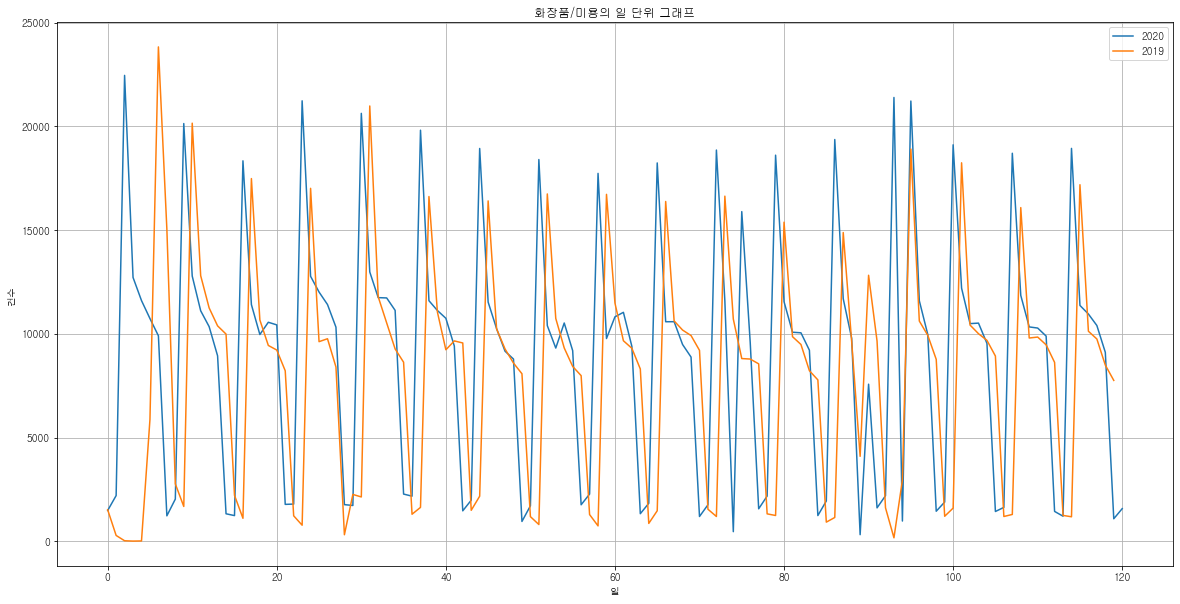

In [68]:
stack_21 = stack.loc[stack["DL_GD_LCLS_CD"] == 21].groupby("DL_YMD").sum().reset_index()
temp_20 = stack_21[["DL_YMD","INVC_CONT"]].loc[stack_21["DL_YMD"]>200000]
temp_19 = stack_21[["DL_YMD","INVC_CONT"]].loc[stack_21["DL_YMD"]<200000]
day_graph("화장품/미용의",121,120)